In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(r"C:\Users\chspr\OneDrive\Desktop\Elderly_Wearable_Tech\Data Science\Alzeimer's Prediction\Alzheimer's dataset.csv")

# Check for null values in each column
null_values = dataset.isnull().sum()

# Determine the data types of each column
data_types = dataset.dtypes
#print(data_types)

# Identify categorical and numerical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()

# Creating a summary table
null_summary = pd.DataFrame({
    "Column Name": dataset.columns,
    "Data Type": ["Categorical" if col in categorical_columns else "Numerical" for col in dataset.columns],
    "Null Values": null_values.values
})
print(null_summary)

# Imputing the 'SES' column with mode
# Mode can return multiple values; we take the first one
ses_mode = dataset['SES'].mode()[0]  
dataset['SES'].fillna(ses_mode, inplace=True)

# Imputing the 'MMSE' column with median
mmse_median = dataset['MMSE'].median()
dataset['MMSE'].fillna(mmse_median, inplace=True)

# Verifying the imputation
imputation_check = dataset.isnull().sum()

# Printing the results
print(imputation_check)

dataset_cleaned = dataset

   Column Name    Data Type  Null Values
0   Subject ID  Categorical            0
1       MRI ID  Categorical            0
2        Group  Categorical            0
3        Visit    Numerical            0
4     MR Delay    Numerical            0
5          M/F  Categorical            0
6         Hand  Categorical            0
7          Age    Numerical            0
8         EDUC    Numerical            0
9          SES    Numerical           19
10        MMSE    Numerical            2
11         CDR    Numerical            0
12        eTIV    Numerical            0
13        nWBV    Numerical            0
14         ASF    Numerical            0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


the data contains 373 rows and 15 columns with various types of information. Here's a brief overview of the columns in the dataset:

Subject ID: A unique identifier for each subject in the study.

MRI ID: A unique identifier for each MRI scan.

Group: The classification of the subject, such as Nondemented, Demented, converted.

Visit: Indicates the visit number for the subject, where some subjects have multiple visits.

MR Delay: The delay time in days between the first visit and the subsequent visit(s).

M/F: The gender of the subject, where "M" is male and "F" is female.

Hand: The dominant hand of the subject, with "R" indicating right-handed.

Age: The age of the subject at the time of the visit.

EDUC: The years of education of the subject.

SES: Socioeconomic status, a numerical value.

MMSE: Mini-Mental State Examination score, a measure of cognitive function.

CDR: Clinical Dementia Rating, a numerical score that quantifies the severity of symptoms of dementia.

eTIV: Estimated Total Intracranial Volume, a measure of brain volume.

nWBV: Normalized Whole Brain Volume, a measure related to the size of the brain.

ASF: Atlas Scaling Factor, used in normalizing brain volumes

## Summary Statistics for Numerical Columns:

In [2]:
summary_statistics = dataset_cleaned.describe()
print(summary_statistics)

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.436997   
std      0.922843   635.485118    7.640957    2.876339    1.109307   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.351206    0.290885  1488.128686    0.729568    1.195461  
std      3.675329    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

Visit: The dataset contains data from 1 to 5 visits per subject, with an average of 1.88 visits.

MR Delay: The delay between the first and subsequent visits varies widely, from 0 to 2639 days, with a mean delay of approximately 595 days.

Age: Subjects range from 60 to 98 years old, with a mean age of 77 years.

EDUC: Education level ranges from 6 to 23 years, with a mean of approximately 14.6 years.

SES (Socioeconomic Status): Ranges from 1 to 5, with a mean of 2.46.

MMSE (Mini-Mental State Examination): Scores range from 4 to 30, with a higher score indicating better cognitive function. The mean score is around 27.3.

CDR (Clinical Dementia Rating): Scores range from 0 to 2, with a mean of 0.29. A higher score indicates more severe symptoms of dementia.

eTIV (Estimated Total Intracranial Volume): Ranges from 1106 to 2004 cubic millimeters, with a mean of approximately 1488.1.

nWBV (Normalized Whole Brain Volume): Ranges from 0.644 to 0.837, with a mean of approximately 0.73.

ASF (Atlas Scaling Factor): Ranges from 0.876 to 1.587, with a mean of approximately 1.195

## Distribution of categorical variables

In [3]:
categorical_distribution = dataset_cleaned.select_dtypes(include=['object']).describe()
print(categorical_distribution)

       Subject ID         MRI ID        Group  M/F Hand
count         373            373          373  373  373
unique        150            373            3    2    1
top     OAS2_0070  OAS2_0001_MR1  Nondemented    F    R
freq            5              1          190  213  373


Subject ID: There are 150 unique subjects in the dataset, indicating that some subjects have multiple entries due to repeated visits.

MRI ID: Each of the 373 entries has a unique MRI ID.

Group: The dataset includes three groups - Nondemented, Demented, converted. The most common group is "Nondemented".

M/F: There are more female subjects (213) than male in the dataset.

Hand: All subjects in this dataset are right-handed ("R")

## histogram for numerical values

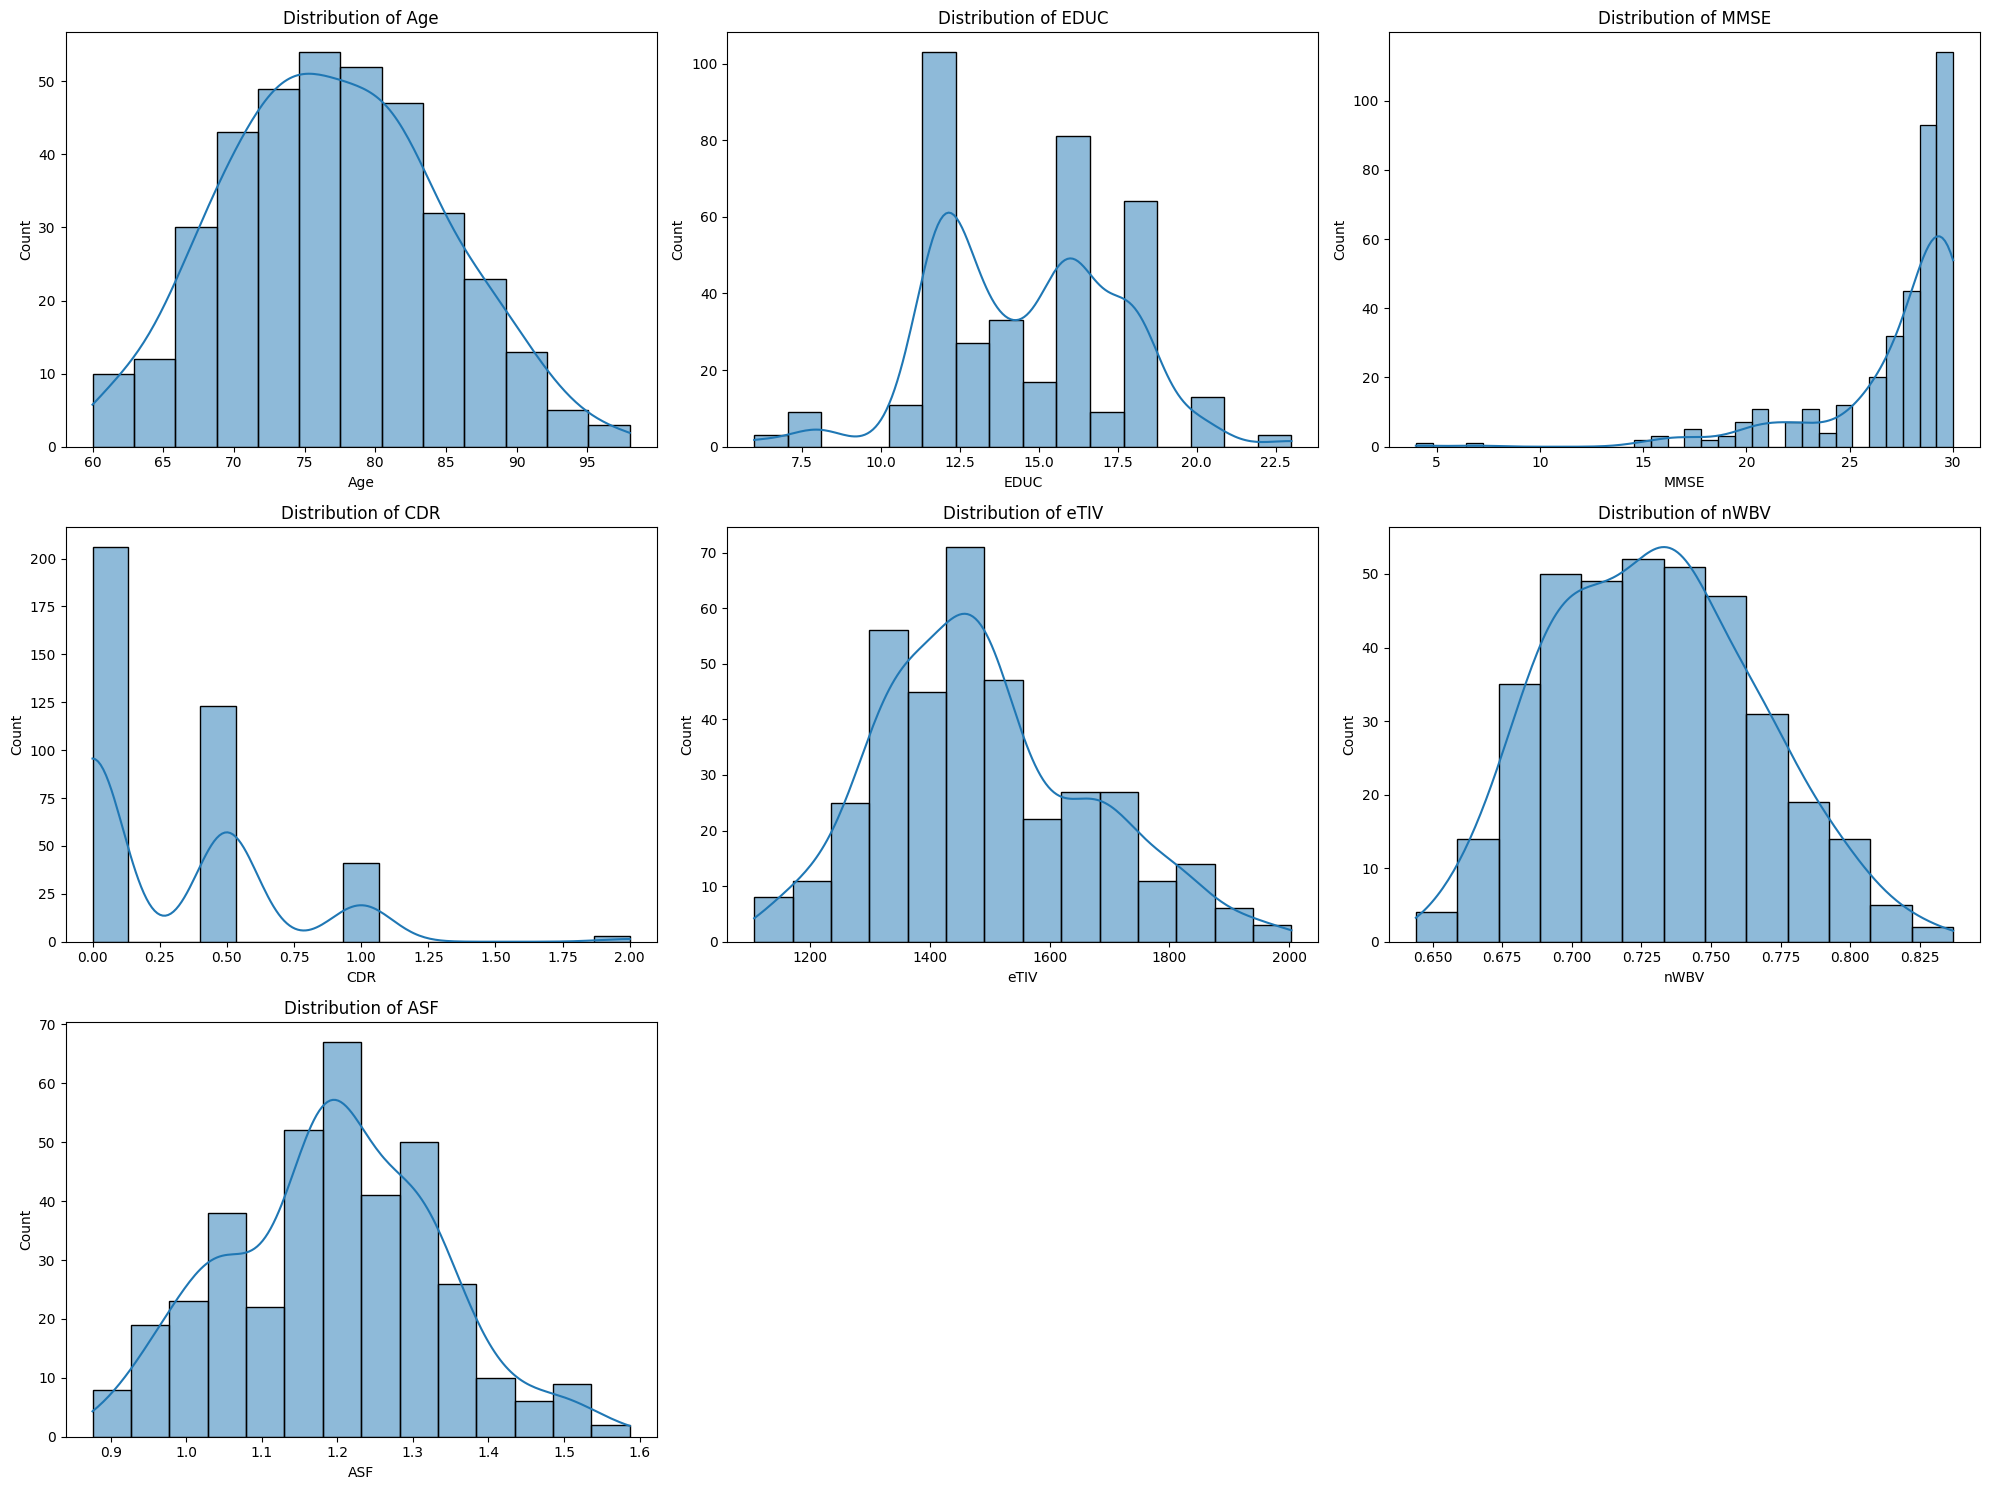

In [4]:
plt.figure(figsize=(20, 15))

numerical_columns = ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

plt.show()

## Bar charts for categorical variables

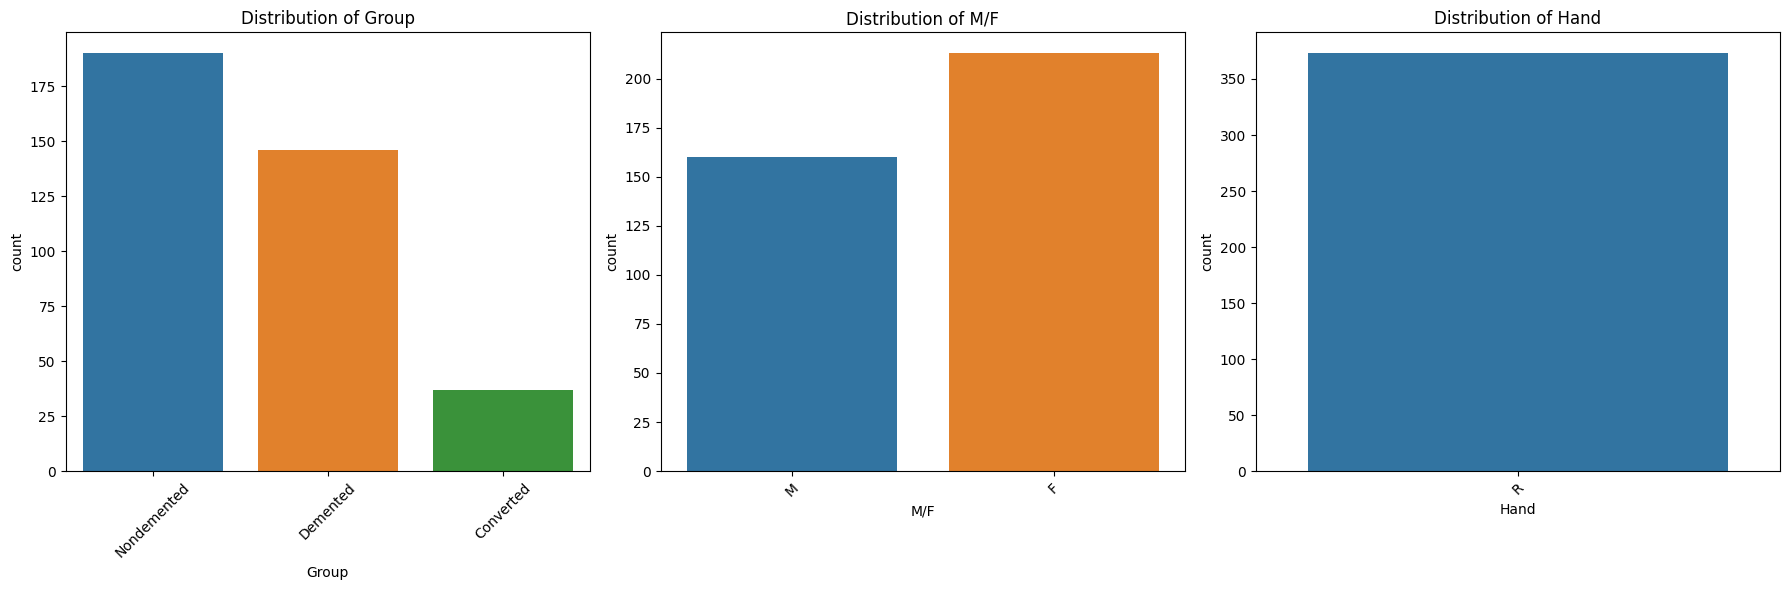

In [5]:
categorical_columns = ['Group', 'M/F', 'Hand']

plt.figure(figsize=(18, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=dataset_cleaned)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Group: This chart shows the distribution of subjects across different groups, likely representing different stages or statuses regarding dementia. The groups are Nondemented, Demented, and converted.

M/F (Gender): The distribution of subjects by gender, showing a comparison between the number of male and female participants.

Hand (Dominant Hand): Given all subjects in the dataset are right-handed, this chart confirms that by showing a single bar.

## correlation matrix

C:\Users\chspr\AppData\Local\Temp\ipykernel_17428\2539431887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset_cleaned.corr()


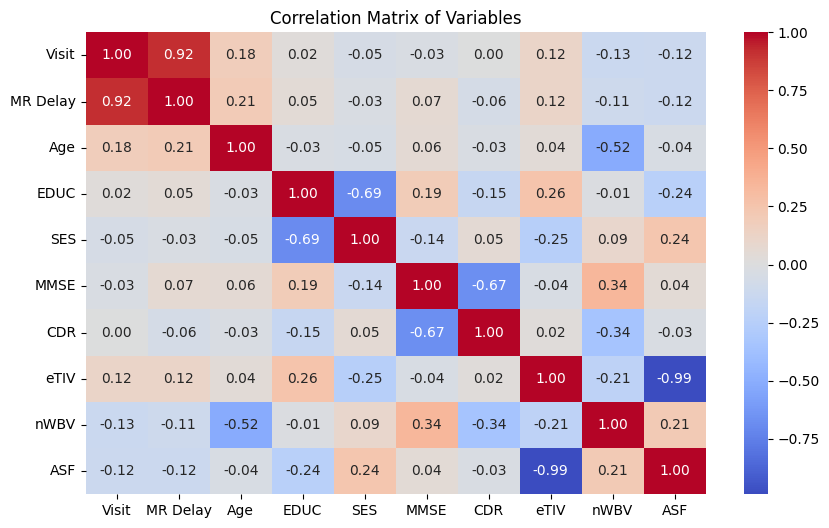

In [6]:
# Computing the correlation matrix
correlation_matrix = dataset_cleaned.corr()

# Plotting the correlation heatmaps of variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

The correlation matrix provides insights into the relationships between the variables in the dataset. Key observations include:

1.Visit and MR Delay: There's a very high positive correlation (0.92), which is expected as more visits likely correspond to a longer duration since the first visit.

2.Age and nWBV (Normalized Whole Brain Volume): A significant negative correlation (-0.52) exists, indicating that as age increases, the normalized whole brain volume tends to decrease.

3.EDUC and SES (Socioeconomic Status): A strong negative correlation (-0.69) is observed, suggesting that subjects with higher education levels may have a lower socioeconomic status within this dataset, which is an interesting relationship that might merit further investigation.

4.MMSE and CDR (Clinical Dementia Rating): A strong negative correlation (-0.67) is found, indicating that higher MMSE scores (better cognitive function) are associated with lower CDR scores (lesser severity of dementia).

5.eTIV (Estimated Total Intracranial Volume) and ASF (Atlas Scaling Factor): There is a perfect  negative correlation (-0.99), which likely reflects the inverse relationship by definition between brain volume size and the scaling factor used in brain volume measurements.

6.MMSE and EDUC : There's a positive correlation (0.19), indicating that higher education levels might be associated with better MMSE scores.

7.CDR and SES : CDR also shows a strong negetive correlation with SES (-0.67), suggests that indivudials with higher socioeconomic status have lower CDR scores, potentially indicating less serve symptoms of dementia.

# Exploratory Data Analysis

## prediction model

Mini mental status examination(MMSE) is our predictive variable because: 

it is a common tool to check memory and thinking skills. 

it is easy to do and doesnt take much time. 

it can be helpful for tracking how someones cognitive health changes over the time.


To visualize the distribution of MMSE scores across the different categories of other variables, we would typically use boxplots for categorical variables and scatter plots for continuous variables

## Distribution of MMSE with other variables

In [7]:
# Categorizing the MMSE scores into classes
def categorize_mmse(score):
    if score >= 24:
        return 'Normal'
    elif 19 <= score <= 23:
        return 'Mild'
    elif 10 <= score < 18:
        return 'Moderate'
    else:
        return 'Severe'

dataset_cleaned['MMSE_Class'] = dataset_cleaned['MMSE'].apply(lambda x: categorize_mmse(x))

# Checking the distribution of MMSE classes
mmse_class_distribution = dataset_cleaned['MMSE_Class'].value_counts(normalize=True) * 100


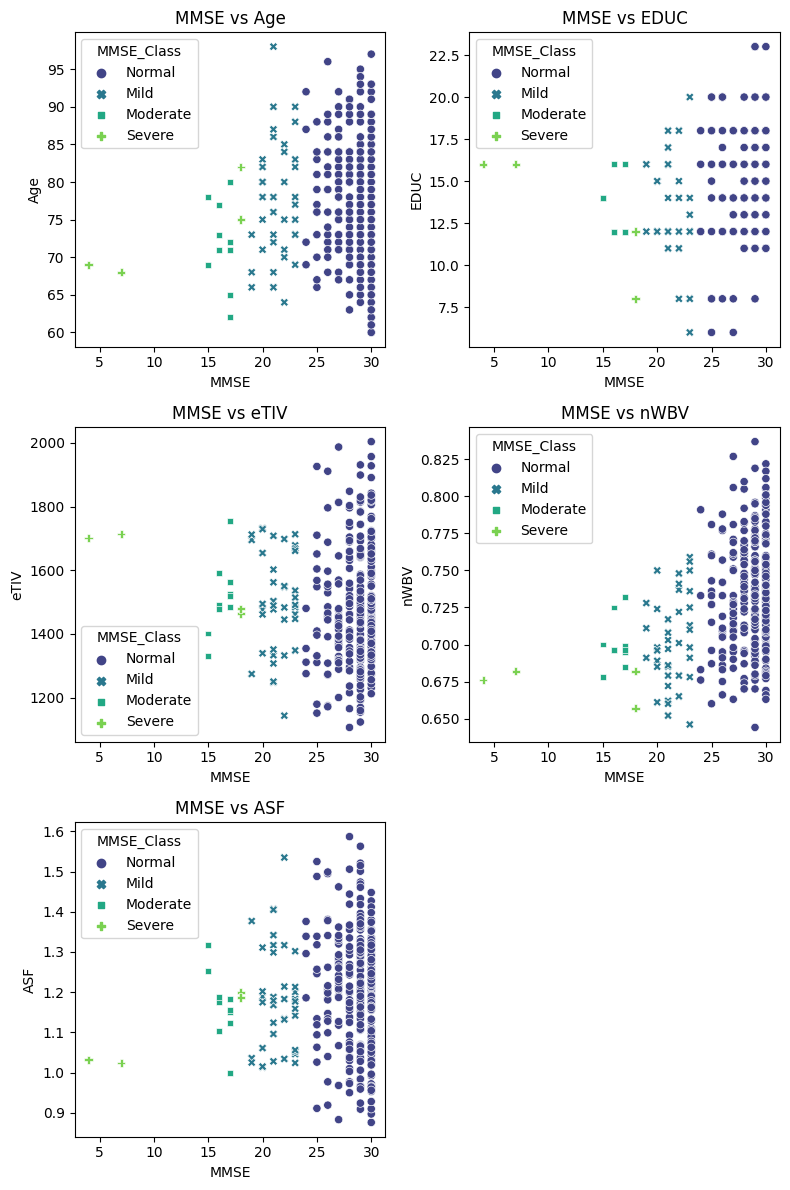

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF MMSE_Class  
0  2.0  27.0  0.0  1987  0.696  0.883     Normal  
1  2.0  30.0  0.0  2004  0.681  0.876     Normal  
2  2.0  23.0  0.5  1678  0.736  1.046       Mild  
3  2.0  28.0  0.5  1738  0.713  1.010     Normal  
4  2.0  22.0  0.5  1698  0.701  1.034       Mild  


In [8]:
continuous_vars = ['Age', 'EDUC', 'eTIV', 'nWBV', 'ASF']

# Set up the matplotlib figure
plt.figure(figsize=(8, 12))

# Create a scatter plot for each continuous variable
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=dataset_cleaned, x='MMSE', y=var, hue='MMSE_Class', style='MMSE_Class', palette='viridis')
    plt.title(f'MMSE vs {var}')

plt.tight_layout()
plt.show()

print(dataset_cleaned.head())

MMSE vs Age: There's a visible trend showing older ages having a wider range of MMSE scores, with more points in the lower scoring categories, indicating a possible association between higher age and lower cognitive function.

MMSE vs EDUC: Higher education levels mostly correspond with 'Normal' MMSE scores, but there's no clear trend across MMSE categories, suggesting that the relationship between education and cognitive function as measured by MMSE might not be straightforward.

MMSE vs eTIV: There is no distinct trend indicating a relationship between eTIV and MMSE scores, as points are spread across all levels of eTIV without a clear pattern.

MMSE vs nWBV: Lower nWBV values show more instances of 'Moderate' and 'Severe' cognitive impairment, suggesting that smaller normalized brain volumes might be associated with lower MMSE scores.

MMSE vs ASF: Similar to eTIV, ASF points are scattered, not showing a clear relationship with MMSE scores.

In [9]:
#converted is turned as demented
dataset_cleaned['Group'] = dataset_cleaned['Group'].replace(['Converted'], ['Demented'])
# Converting the catagorical values in numerical
dataset_cleaned['M/F'] = dataset_cleaned['M/F'].replace(['M','F'], [0,1])
dataset_cleaned['Group'] = dataset_cleaned['Group'].replace(['Nondemented', 'Demented'], [1,0])
dataset_cleaned['MMSE_Class'] = dataset_cleaned['MMSE_Class'].replace(['Normal' , 'Mild' , 'Moderate' , 'Severe'] , [0,1,2,3])
display(dataset_cleaned.head())

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_Class
0,OAS2_0001,OAS2_0001_MR1,1,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001,OAS2_0001_MR2,1,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,OAS2_0002,OAS2_0002_MR1,0,1,0,0,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,OAS2_0002,OAS2_0002_MR2,0,2,560,0,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,0
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,0,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Defining features and target
X = dataset_cleaned.drop(['Subject ID', 'MRI ID', 'Visit','MR Delay', 'Hand', 'MMSE', 'MMSE_Class'], axis=1)
y = dataset_cleaned['MMSE_Class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Settingup a pipeline for logistic regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

# Defining the grid of parameters
param_grid_lr = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Settingup GridSearchCV
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

# Evaluating the model
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Cross-Validated Accuracy for Logistic Regression:", best_score_lr)
print("Test Set Accuracy for Logistic Regression:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", report_lr)

C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Logistic Regression: {'logistic__C': 100, 'logistic__penalty': 'l2'}
Best Cross-Validated Accuracy for Logistic Regression: 0.8791525423728814
Test Set Accuracy for Logistic Regression: 0.8933333333333333
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.50      0.25      0.33         8
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.89        75
   macro avg       0.60      0.56      0.57        75
weighted avg       0.86      0.89      0.87        75



C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:

In [11]:
from sklearn.svm import SVC

# Setting up a pipeline for SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Defining the grid of parameters
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Setting up the GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Evaluating the model
y_pred_svm = grid_search_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Best Parameters for SVM:", best_params_svm)
print("Best Cross-Validated Accuracy for SVM:", best_score_svm)
print("Test Set Accuracy for SVM:", accuracy_svm)
print("Classification Report for SVM:\n", report_svm)

C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for SVM: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validated Accuracy for SVM: 0.8791525423728814
Test Set Accuracy for SVM: 0.88
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        65
           1       0.50      0.25      0.33         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.88        75
   macro avg       0.35      0.31      0.32        75
weighted avg       0.83      0.88      0.85        75



C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline with scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the pipeline
pipeline_knn.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_knn.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.50      0.38      0.43         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.88        75
   macro avg       0.35      0.34      0.34        75
weighted avg       0.84      0.88      0.86        75



C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chspr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,